In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Data

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species']=data['species'].replace({a: b for a, b in zip([0,1,2], iris.target_names)})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Graphical EDA

## Histogram of Iris Petal Length

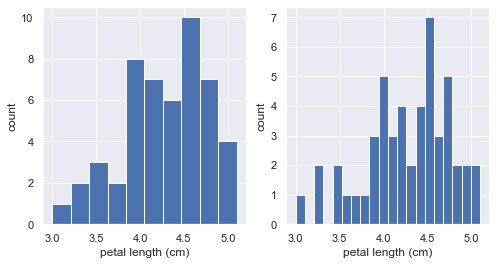

In [3]:
versicolor = data.query("species == 'versicolor'")
sns.set()
plt.figure(figsize=(8, 4))
plt.subplot(1,2, 1)
plt.hist(versicolor['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('count')

plt.subplot(1,2, 2)
plt.hist(versicolor['petal length (cm)'], bins=20)
plt.xlabel('petal length (cm)')
plt.ylabel('count');

The number of bins may lead to different interpretation of the data. To avoid binning bias, we can switch to bee swarm plot to visualize each point.

## Bee Swarm Plot to view petel length by species

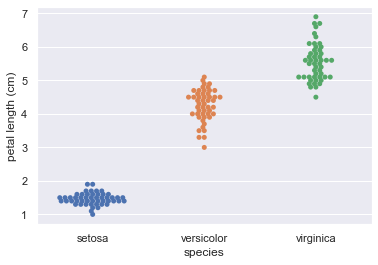

In [40]:
plt.figure(figsize=(6, 4))
sns.swarmplot(x='species', y='petal length (cm)', data=data)
plt.ylabel('petal length (cm)')
plt.xlabel('species');

I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

## Plotting ECDF

Bee swarm plot has limitations when data points are large and overlapped. In this case, using epirical cumulative distribution function is more suitable. 

In [4]:
def ecdf(df):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(df)

    # x-data for the ECDF: x
    x = np.sort(df)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

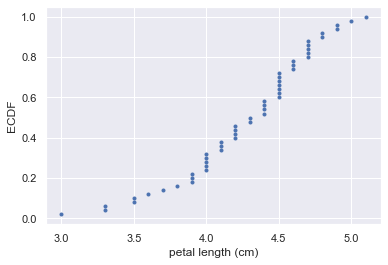

In [5]:
x_vers, y_vers = ecdf(versicolor['petal length (cm)'])
plt.plot(x_vers, y_vers, marker='.', linestyle='None')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF');

Compare the petal length among all species

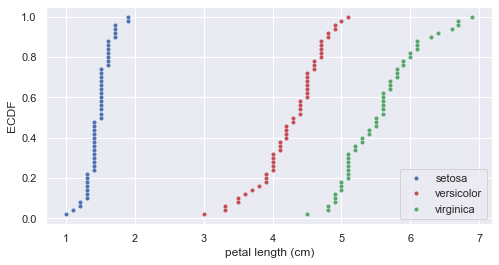

In [60]:
plt.figure(figsize=(8, 4))
for name, color in zip(iris.target_names, ['b', 'r', 'g']):
    x, y = ecdf(data.query("species=='{}'".format(name))['petal length (cm)'])
    plt.plot(x, y, marker='.', linestyle='None', color=color, label=name)

plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.legend(loc='lower right');

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

## Comparing percentiles to ECDF

[3.3    4.     4.35   4.6    4.9775]


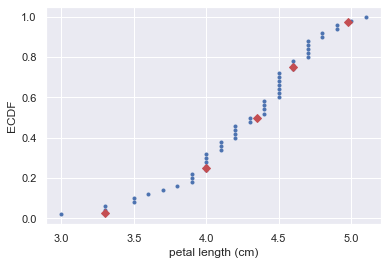

In [9]:
# get the nth percentile values
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor['petal length (cm)'], percentiles)
print(ptiles_vers)

x_vers, y_vers = ecdf(versicolor['petal length (cm)'])
plt.plot(x_vers, y_vers, marker='.', linestyle='None')
plt.plot(ptiles_vers, percentiles/100, marker='D', color='r', linestyle='None')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF');

## Boxplot

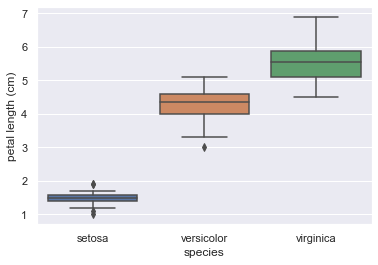

In [12]:
sns.set()
sns.boxplot(y='petal length (cm)', x='species', data=data)
plt.xlabel('species')
plt.ylabel('petal length (cm)');

## Stats
- variances
- covariances
- pearson correlation coefficient

In [13]:
versicolor_petal_length = data.query("species == 'versicolor'")['petal length (cm)']
versicolor_petal_width = data.query("species == 'versicolor'")['petal width (cm)']

print(f'variances of petal length: {np.var(versicolor_petal_length)}')
print(f'variances of petal width: {np.var(versicolor_petal_width)}')
print(f'covariances of petal width:\n {np.cov(versicolor_petal_length, versicolor_petal_width)}')
print(f'pearson correlation coefficient:\n {np.corrcoef(versicolor_petal_length, versicolor_petal_width)}')

variances of petal length: 0.21640000000000004
variances of petal width: 0.038324
covariances of petal width:
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
pearson correlation coefficient:
 [[1.         0.78666809]
 [0.78666809 1.        ]]


`np.cov(x, y)` returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y.

## Thinking probabilistically

What is the goal of statistical inference?

- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.

Why do we use the language of probability in statistical inference?
- Probability provides a measure of uncertainty.
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.
- Probabilistic language is in fact very precise. It precisely describes uncertainty.

## Random number generator

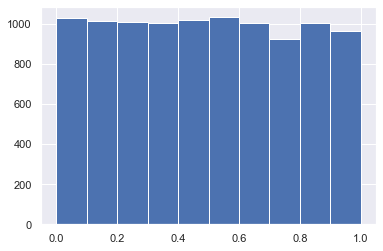

In [15]:
np.random.seed(42)
n=10000

random_numbers = np.empty(n)
for i in range(n):
    random_numbers[i]=np.random.random()
    
sns.set()
plt.hist(random_numbers);

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

## Bernoulli trials

How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. We can simulate the experiment for 1000 times.

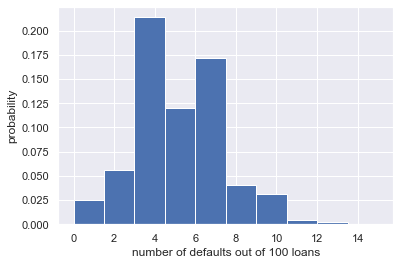

In [30]:
np.random.seed(42)

trials = 10000
p=0.05 #default rate

n_defaults = np.empty(trials)
for i in range(trials):
    n_defaults[i] = sum(np.random.random(100)<p)

sns.set()
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability');

Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [27]:
n_loses = sum(n_defaults >=10)
print('Percentage of losing money:%.3f'%(n_loses/len(n_defaults)))

Percentage of losing money:0.022


## Binomial Probability Mass Function

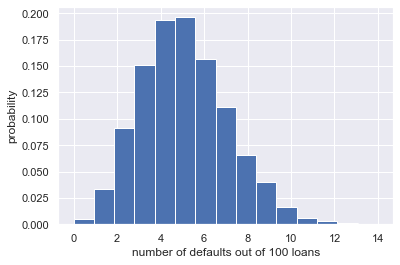

In [33]:
np.random.seed(42)
p=0.05 #default rate
trials = 10000

n_defaults = np.random.binomial(n=100, p=p, size=trials)
sns.set()
plt.hist(n_defaults, density=True, bins=15)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability');

## Poisson distributions

Relationship between Binomial and Poisson distributions

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [34]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

Case study:

> Was 2015 anomalous?

> 1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [35]:
random_no_hits = np.random.poisson(251/115, size=10000) #10000 trials
n_large = sum(random_no_hits >= 7)
p_large = n_large/10000
print('Probability of seven or more no-hitters:%.4f'%p_large)

Probability of seven or more no-hitters:0.0067


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.